우리가 머신러닝 딥러닝을 통해 알고 싶은것은 분류, 분석(회기)

답(label)을 알고 있으면 데이터와 답을 주고 규칙을 찾을수 있다.

- 머신러닝 프로세스

1. 데이터수집 다양한종류의

2. 데이터 전처리

3. 모델설계

4. 모델 결과 해석

5. 시각화



In [3]:
# 코딩으로 확인하는 최소 제곱법(일차 함수만 적용)
# -*- coding: utf-8 -*-

import numpy as np

#x 값과 y 값
x = [2, 4, 6, 8]               #데이터 값들을 리스트 x, y로 정의
y = [81, 93, 91, 97]

#x와 y의 평균값     mx, my
mx = np.mean(x)
my = np.mean(y)         

print('x의 평균값: ', mx)       #5.0
print('y의 평균값: ', my)       #90.5

#기울기 공식의 분모
divisor = sum([(i- mx)**2 for i in x])  #divisor(분모) x의 각 원소와 x의 평균값들의 차를 제곱하여 더한다.
#기울기 공식의 분자
def top(x, mx, y, my):
  d = 0
  for i in range(len(x)):
    d += (x[i] - mx) * (y[i] - my)
  return d

dividend = top(x, mx, y, my)

print('분모: ', divisor)    #20.0
print('분자: ', dividend)   #46.0




x의 평균값:  5.0
y의 평균값:  90.5
분모:  20.0
분자:  46.0


#평균 제곱 오차 (mse)

- 평균 제곱 오차(mean square error, MSE): 딥러닝에서 오차를 평가하는 방법 중 가장 많이 사용됨

- 최소 제곱법과 다르게 여러 변수가 있을 때도 사용 가능 

- 여러 개의 입력 값을 계산할 때 임의의 선을 그리고 난 후,
이 선이 얼마나 잘 그려졌는지를 평가하여 조금씩 수정해 가는 방법

-가설을 하나 세운뒤, 이 값이 주어진 요건을 충족하는지 판단하여 조금씩 변화를 주고, 이 변화가 긍정적이면 오차가 최소가 될 때까지 이 과정을 계속 반복하는 방법

#"일단 선을 그어보고, 조금씩 수정해 가기"



    Lost Function 오차함수 중 

    MSE / 평균 제곱오차/ 회귀문제

    속도가 느리다는 단점

    categorical_crossentropy/범주형 교차 엔트로피/ 다중클래스 분류
    binary_crossentropy/ 이항 교차 엔트로피/ 이진 클래스 분류

    장점: 출력 값에 로그를 취해서 오차가 커지면 수렴 속도 증가,

    오차가 작아지면 수렴 속도 감소

위에 세가지를 가장 많이 사용.

- 그래프의 기울기가 잘못 되었을수록 빨간색 선의 거리의 합, 즉 오차의 합도 커짐

- 만약 기울기가 무한대로 커지면 오차도 무한대로 커지는 상관관계가 있는 것을 알 수 있음

- 거리는 입력 데이터에 나와 있는 y의 '실제 값'과 x 를 오차 =실제값 - 예측값 의 식에 대입해서 나오는 '예측값' 과의 차이를 통해 구할 수 있음

- 오차에 양수와 음수가 섞여 있어서 오차를 단순이 더해버리면 합이 0이 될수도 있음

   오차의 합을 구할 때는 각 오차의 값을 제곱해줌


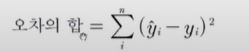


- i는 x가 나오는 순서, n 은 x원소의 총 개수를 의미함

- y_hat i 는 Xi에 대응하는 '실제 값'

- Yi는 Xi 가 대입되었을때 직선의 방정식이 만드는 '예측값'

- 이 식으로 오차의 합을 다시 계산하면 1 + 25 + 9 + 9 = 44

- 평균 제곱 오차(Mean Squared Error, MSE):
   오차의 합에 이어 각 x의 값의 평균 오차를 이용함
   
   위에서 구한 값을 n으로 나누면 오차 합의 평균을 구할 수 있음
  
   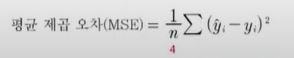


- 이 식에 의해, 앞서 그은 임의의 직선은 44/4 = 11의 평균제곱오차(mse)를 갖는 직선

- 선형 회귀
   임의의 직선을 그어 이에 대한 평균 제곱 오차(mse)를 구하고, 이 값을 가장 작게 만들어주는 a 와 b값을 찾아가는 작업




In [5]:
# -*- coding: utf-8 -*-

import numpy as np

#가상의 기울기 a 와 y 절편 b             임의로 정한 기울기 a와 y절편 b의 값이 각각 3, 76
fake_a_b = [3, 76]

# x 값과 y 값
data = [[2, 81], [4,93], [6, 91], [8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#y = ax+b 에 a,b 값 대입하여 결과를 출력하는 함수      일차방정식 y= ax+b 를 구현하는 함수 predict
def predict(x):
  return fake_a_b[0]*x + fake_a_b[1]

#MSE 함수                                         평균제곱오차mse를 계산해주는 함수 mse
def mse(y, y_hat):
  return ((y-y_hat)**2).mean()

#MSE 함수를 각 y 값에 대입하여 최종 값을 구하는 함수
def mse_val(y, predict_result):
  return mse(np.array(y), np.array(predict_result))

#예측값이 들어갈 빈 리스트
predict_result = []

#모든 x값을 한번씩 대입하여 predict_result 리스트 완성
for i in range(len(x)):
  predict_result.append(predict(x[i]))
  print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" %(x[i], y[i], predict(x[i])))

#처음 가정한 a=3, b= 76은 오차가 약 11.0 이라는 것 확인
#앞으로할일: 이 오차를 줄이는 새로운선 긋기, a와 b의 값을 적절히 조절하면서 오차 그 오차가 최소화되는 a, b 구하기 >경사 하강법

#최종 MSE 출력
print("MSE 최종값: "+ str(mse_val(predict_result, y)))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
MSE 최종값: 11.0


# 경사하강법의 개요

- a를 무한대로 키우거나 a를 무한대로 작게 할 때 오차도 무한대로 커지는 이러한관계는 이차함수 그래프로 표현
우리가 이런 이차함수 그래프에 어떠한 점을 찍었을때 이 점을 m에 가까운 쪽으로 점점 이동시키는 과정 (arg min)

- 경사 하강법(gradient descent)
  미분 기울기를 이용해서 그래프에서 오차를 비교하여 가장 작은 방향으로 이동시키는 방법

- y=x^2 그래프에서 x에 다음과 같이 a1, a2, 그리고 m 을 대입하여 그 자리에서 미분하면 각 점에서의 순간 기울기가 그려짐

- 학습률을 너무 크게 잡으면 한점으로 수렴하지 않고 발산한다. 

- 최적의 학습률을 찾는 최적화 과정이 중요하다.

다중 선형회귀 y = a1x1 + a2x2 + b 에서 중요한것은 기울기를 두개 구하는것.

경사하강법을 이용해서 구함.

# 로지스틱 회귀

로지스틱 회귀는  분류 문제

시그모이드에서 시작된 활성화 함수는 relu를 비롯해 다양한 종류가 있다.

렐루는 0이하는 다 0, 0< 경우 x



미분법

- 미분방정식의 계수는 가장 큰 미분 횟수임

- 차수는 미분방정식의 최고 계수하의 거듭제곱 횟수임.

- x와 y에 대해서 미분할때는
   x를 미분할때 y는 상수로 취급, y를 미분할때 x는 상수로 취급.

- 평균값 정리와 롤 정리


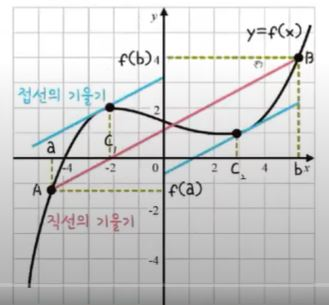

- 즉 평균값 정리는 곡선 y = f(x)의 접선 중에서  직선 A,B 와 평행하는 접점 (c1,c2) 이 a와 b t사이에 적어도 하나가 존재함을 의미

- 평균값 정리를 이용하면 간단히 증명 할 수 있는 경우가 있음

- 즉, 그래프로 표현이 어려운 미적분을 간단히 증명하는 데 사용함.



- 롤의 정리 : 
   함수 f(x) 가 닫힌구간[a, b]에서 연속이고 열린구간(a, b)에서 미분 가능 할때, f(a) = f(b) 이면 f'(c)=0 (a< c< b)인 c가 열린수간 (a, b)에 적어도 하나 존재한다.



- 거리는 방향이 없고 크기만 있는 물리량 이를 스칼라양 이라고 한다.
   이동거리는 방향이 없으니, 20미터 앞으로가고 10미터 뒤로 가도 이동거리는 30미터

- 변위는 도착점이 출발점에서 얼마나 떨어져 있는지,즉 위치변화를 나타내기 때문에 크기 뿐만 아니라 방향도 있음

- 이러한 물리량을 벡터양 이라고 하며 20미터 갔다가 10미터 뒤로 가면 자동차의 변위는 10미터임


- 속력과 속도

      속력 = 이동거리/시간

      속도 = 변위/시간

      자동차가 5m 를 가는데 1초가 걸린다 가정하고 계산하면

      속력 = 30m/6 = 5m/s

      속도 = 10/6 = 약 1.7m/s


- 평균 변화율은 좌표 위 점 A와 B 사이의 변화율

- 순간 변화율은 특정한 지점을 한 순간으로 잡은 변화율

- 미분에서 속도는 평균변화율이 아닌 순간변화율을 의미

- 위치가 시간에 대한 함수로 표현되어 있을 때 그 위치를 시간에 대해 미분하면 속도가 나옴. 


- 곱 법칙(product rule)

- f(x)와 g(x) 모두 미분 가능하다면, 'f'(x) 의 도함수와 g(x)의 곱' 과 f(x)와 g(x)도 함수의 곱' 을 더한 것과 같음

- 합(차) 법칙
   f(x)와 g(x) 모두 미분 가능하다면, 함수들의 합(차) 도함수는 각 도함수의 합(차)과 같음

- 몫 법칙(quotient rule)
   f(x)와 g(x) 모두 미분 가능하다면, 분자의 도함수에 분모를 곱하고 분자에 분모의 도함수를 곱해서 뺀 값을 분모의 제곱으로 나눈 것과 같음.

블랙박스 모델은 연쇄법칙 때문에 계산이 가능해진다.

- 연쇄법칙은 두 함수를 합성한 합성함수의 미분법임.

- 두 함수 f: X-> Y, g:Y ->Z가 주어졌을때, 집합 X의 임의의 원소 x에 대해 f(x)를 대응 시키고, f(x) 를 g(f(x)) 에 대응시켜서 X에서 Z로의 함수를 만들 수 있음.


오차 역전파란 
- 역전파는 계산 결과와 정답의 오차를 구해서 이 오차에 관여하는 노드 값들의 가중치와 편향을 수정함

- 이때 오차 역전파(backpropagation)는 오차가 작아지는 방향으로 반복해서 수정함. 

- 이 횟수가 커지면 그만큼 정확성은 높아지지만 시간이 오래걸리는 단점

- 횟수가 작아지면 정확성은 떨어지지만 시간은 단축되는 장점

- 이 횟수의 주기를 1 에포크(epoch) 라고 함

- 에포크를 늘리면서 가중치와 편향을 업데이트(학습)하여 점점 오차를 줄여 나감.

- 오차역전파는 오차를 줄이는 방향으로 바로 앞 가중치를 수정해 간다고 했음

- 가중치를 수정할 때는 순전파에서 계산한 y =g(f(x))의 편미분 값을 오차에 곱해서 하류노드(은닉층)에 전달함

- 이때 편미분을 사용하는 이유는 수많은 노드에 부여되는 모든 가중치 값을 고려할 필요 없이 연결된 가중치만 고려하면 되기 때문임

-연쇄법칙을 이용하면 출력층과 입력층 사이에 은닉층이 많아도 간단한 미분으로 기울기를 계산할 수 있기 때문임

In [6]:
# -*- coding: utf-8 -*-

import numpy as np

#x값과 y값
x = [2, 4, 6, 8]
y = [81, 93, 91, 97]

#x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)

print("x의 평균값: ", mx)
print("y의 평균값: ", my)

#기울기 공식의 문모
divisor = sum([(mx - i)**2 for i in x])

#기울기 공식의 분자
def top(x, mx, y, my):
  d = 0
  for i in range(len(x)):
    d += (x[i]-mx) * (y[i]-my)
  return d
dividend = top(x, mx, y, my)

print("분모: ", divisor)
print("분자: ", dividend)

#기울기와 y절편 구하기
a = dividend / divisor
b = my - (mx*a)

#출력으로 확인
print("기울기 a = ", a)
print("y 절편 b = ", b)

x의 평균값:  5.0
y의 평균값:  90.5
분모:  20.0
분자:  46.0
기울기 a =  2.3
y 절편 b =  79.0


#잘못 그은 선 바로잡기
- 일단 그리고 조금씩 수정해 나가기
- 가성을 하나 세운 뒤 이 값이 주어진 요건을 충족하는지 판단 하여 조금씩 변화를 줌

- 이 변화가 긍정적이면 오차가 최소가 될 때 까지 이 과정을 반복

- 나중에 그린 선이 먼저 그린 선보다 더 좋은지 나쁜지 판한하는 방법

- 즉, 각 선의 오차를 계산할 수 있어야 하고, 오차가 작은 쪽으로 바꾸는 알고리즘이 필요함.

optimization 최적화가 중요함.

- 그래프의 기울기가 잘못 되었을 수록 빨간색 선의 거리의 합, 즉 오차의 합도 커짐

- 만약 기울기가 무한대로 커지면 오차도 무한대로 커지는 상관관계가 있는것을 알수 있음

- 거리는 입력데이터에 나와 있는 y의 실제값 과 x를 y=ax+b의 식에 대입해서 나오는 예측값과의 차이를 통해 구할 수 있음

   오차 =  실제값 - 예측값


# 평균 제곱 오차(Mean Squared Error, MSE)

- 오차의 합에 이어 각 x값의 평균 오차를 이용함

  위에서 구한 값을 n으로 나누면 오차 합의 평균을 구할 수 있음



In [7]:
# -*- coding: utf-8 -*-

import numpy as np

#가상의 기울기 a와 y절편 b
fake_a_b=[3, 76]

# x 값과 y 값
data = [[2, 81], [4, 93], [6, 91], [8, 97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

#y = ax+b에 a,b 값 대입하여 결과를 출력하는 함수
def predict(x):
  return fake_a_b[0]*x +fake_a_b[1]

#MSE 함수
def mse(y, y_hat):
  return ((y_hat-y)**2).mean()

#MSE 함수를 각 y에 대입하여 최종 값을 구하는 함수
def mse_val(y, predict_result):
  return mse(np.array(y), np.array(predict_result))

#예측값이 들어갈 빈 리스트
predict_result = []

#모든 x값을 한번씩 대입하여 predict_result 리스트 완성
for i in range(len(x)):
  predict_result.append(predict(x[i]))
  print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

#최종 MSE 출력
print("MSE 최종값: "+ str(mse_val(predict_result, y)))

공부시간=2, 실제점수=81, 예측점수=82
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=94
공부시간=8, 실제점수=97, 예측점수=100
MSE 최종값: 11.0


argmin x = m

y = x^2 2차항 그래프 u모양 을 convex라고한다. 최소점이존재.

 여기에 -를 붙이면 최대값이나옴 n모양, 이거를 concave라 한다.  

  y= x^2 그래프에서 x에 a1, a2 그리고 m을 대입하여 그 자리에서 미분하면 각 점에서의 순간 기울기가 그려짐. 

  cost function 즉 우리는 비용을 최소화 하는 접점을 구하고자 한다.

  순간기울기가 0인 점이 곧 우리가 찾는 최솟값 m (argmin) 이다.



1. a1 에서 미분을 구함
2. 구해진 기울기의 반대방향(기울기가 +면 음의방향, -면 양의 방향) 으로 얼마간 이동시킨 a2에서 미분을 구함.

3. 위에서 미분한 값이 0이 아니면 위 과정을 반복함.

기울기가 0인 한점(m) 으로 수렴함

경사하강법은 이렇게 반복적으로 기울기 a를 변화시켜서 m의 값을 찾아내는 방법을 말함.

#학습률

- 기울기의 부호를 바꿔 이동시킬때 적절한 거리를 찾지 못해 너무 멀리 이동시키면 a값이 한점으로 모이지 않고 위로 치솟아버림

- 학습률을 너무 크게 잡으면 한 점으로 수렴하지 않고 발산한다.



경사하강법


오차 = residual

- 최솟값을 구하기 위해서는 이차 함수에서 미분을 해야함

- 그 이차 함수는 평균 제곱 오차를 통해 나온다는 것임

- 평균 제곱 오차의 식을 다시 옮겨보면 다음과 같음

1/n ∑(y_hat[i] - y[i])^2

-여기서 y_hat[i] 는 x[i]를 집어 넣었을 때의 값이므로 y[i] = ax[i] +b를 대입하면 다음과 같이 바뀜

1/n ∑((ax[i]+b) -y[i])^2


- 이 값을 미분할 때 우리가 궁굼한 것은 a와 b

- 식 전체를 미분하는 것이 아니라 필요한 값을 중심으로 미분해야 하기 때문

a로 편미분한 결과 = 2/n ∑(ax[i] +b-y[i])x[i]

b로 편미분한 결과 = 2/n∑(ax[i]+b-y[i])



#여기까지 공부하고 보니 이 교안, 책에 오류가 있다 
# 오류는 참값 - 측정값으로 구하는것이다.
# 즉 실제값 - 예측값,
# y - y_hat 이 맞는표현 
